# Import Libraries

In [1]:
!pip install h5py



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Download and Unzip Dataset

In [3]:
# Download the dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 604M/612M [00:05<00:00, 93.3MB/s]
100% 612M/612M [00:05<00:00, 113MB/s] 


In [4]:
# Unzip the dataset
!unzip gtsrb-german-traffic-sign.zip -d /content/gtsrb-german-traffic-sign


Streaming output truncated to the last 5000 lines.
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00010.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00011.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00012.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00013.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00014.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00015.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00016.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00017.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00018.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00019.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00020.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_0

In [5]:
# Check directory structure
!ls /content/gtsrb-german-traffic-sign.zip


/content/gtsrb-german-traffic-sign.zip


In [6]:
os.getcwd()

'/content'

In [7]:
cd/content/gtsrb-german-traffic-sign/Train

/content/gtsrb-german-traffic-sign/Train


In [8]:
os.getcwd()

'/content/gtsrb-german-traffic-sign/Train'

In [9]:

# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [10]:
for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)

In [11]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [13]:

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [14]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

# Show Datasets in CSV Format

In [15]:
train_data=pd.read_csv('/content/gtsrb-german-traffic-sign/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)



In [16]:
train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [17]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [18]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [19]:
cd/content/gtsrb-german-traffic-sign

/content/gtsrb-german-traffic-sign


# Visualize Testing Data

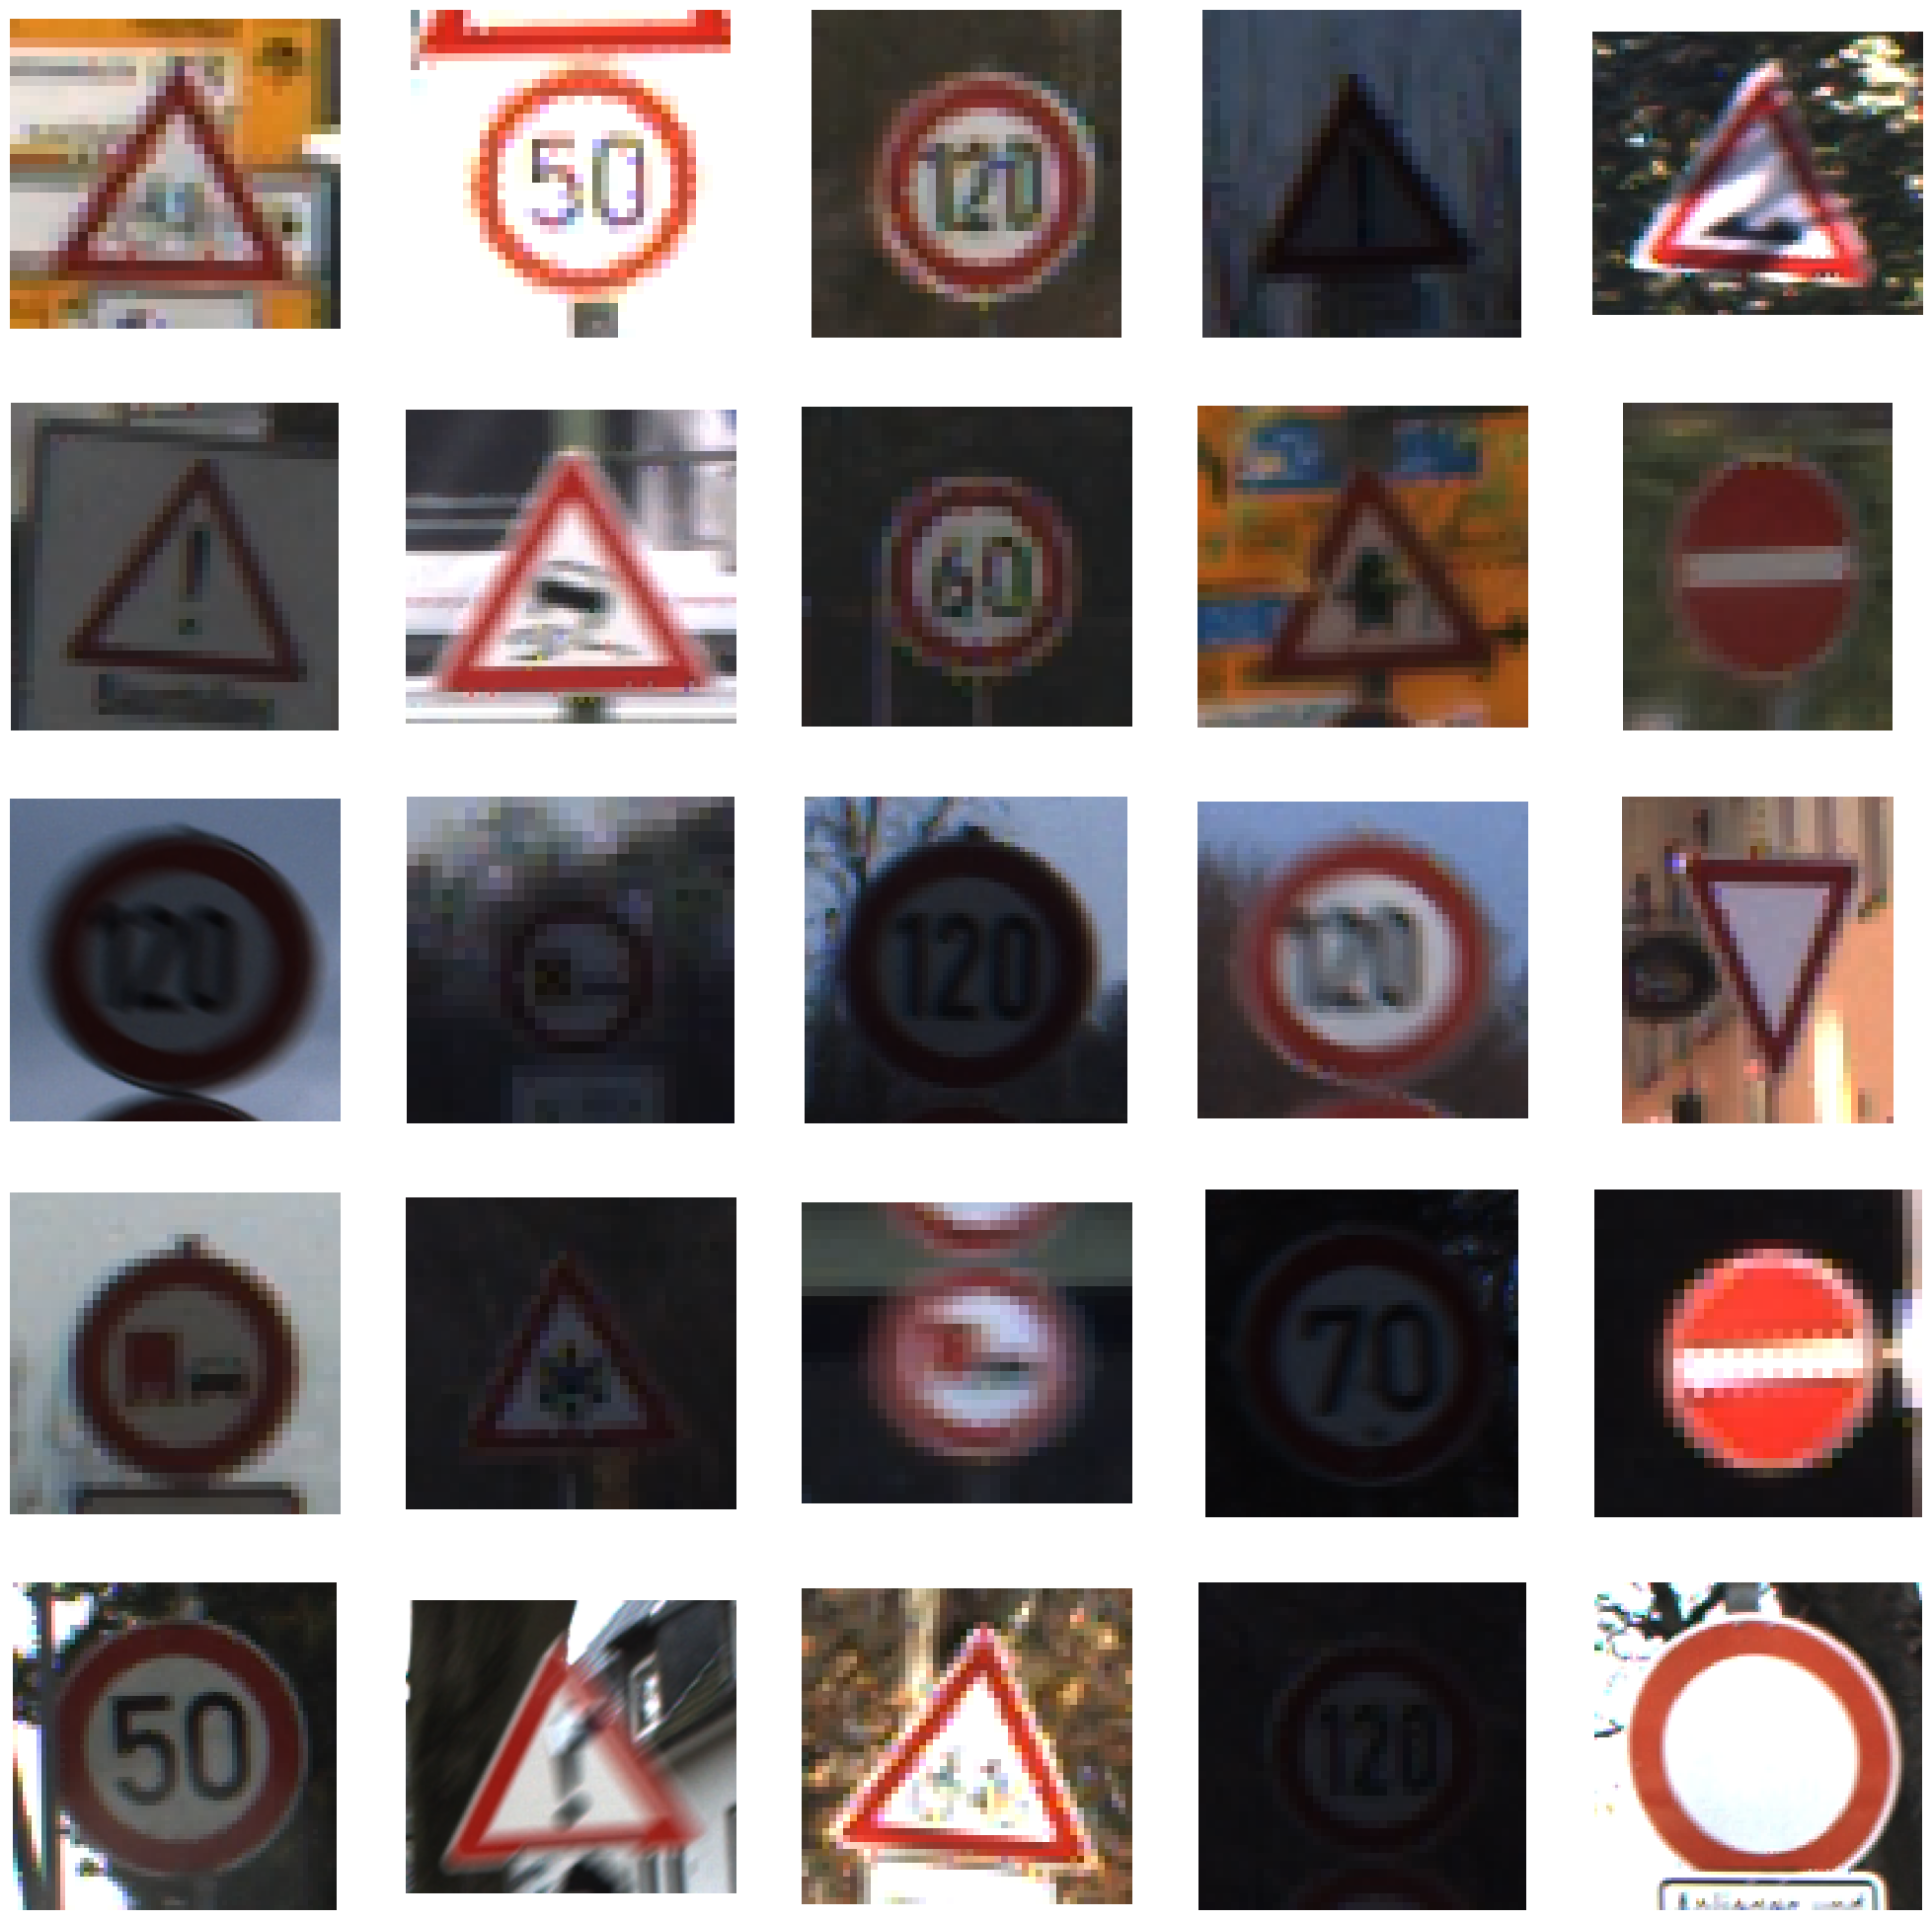

In [20]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(False)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)

In [21]:
cd/content/gtsrb-german-traffic-sign/Train

/content/gtsrb-german-traffic-sign/Train


Visualize the Training Datasets in Sorted Grids Format

Text(0, 0.5, 'Number of images')

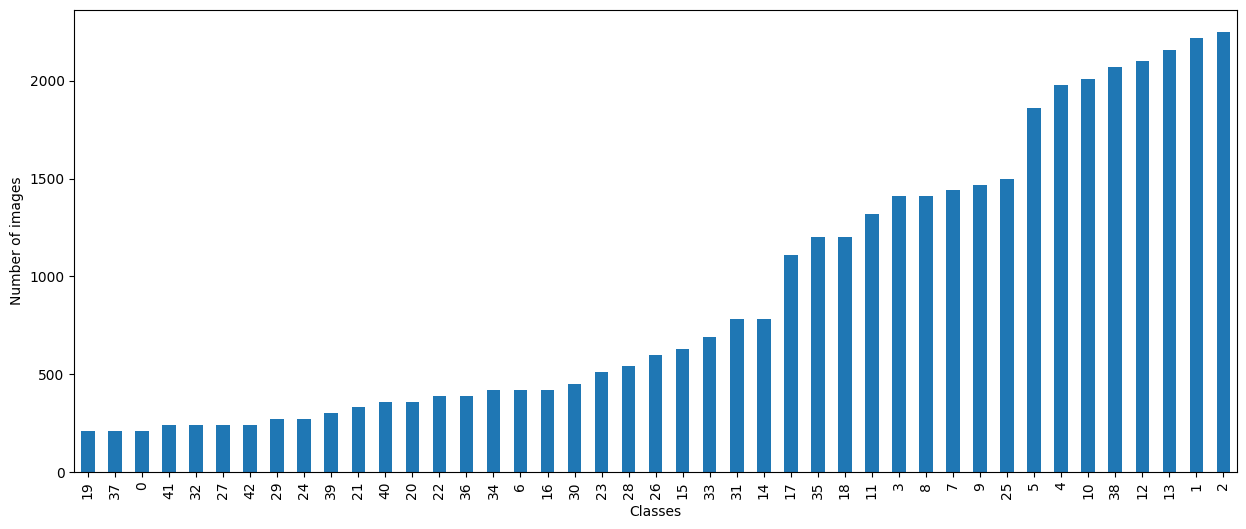

In [22]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

# Build a CNN Model

In [23]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
!pip install visualkeras
import visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


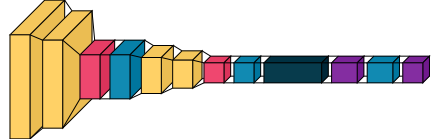

In [26]:
visualkeras.layered_view(model)

# Compile and Train the Model

In [27]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 136s 271ms/step - accuracy: 0.2442 - loss: 4.3305 - val_accuracy: 0.8368 - val_loss: 0.6302
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 134s 255ms/step - accuracy: 0.7560 - loss: 0.8655 - val_accuracy: 0.9481 - val_loss: 0.2726
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 129s 229ms/step - accuracy: 0.8691 - loss: 0.4682 - val_accuracy: 0.9675 - val_loss: 0.1319
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 142s 229ms/step - accuracy: 0.9022 - loss: 0.3411 - val_accuracy: 0.9704 - val_loss: 0.1117
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 143s 231ms/step - accuracy: 0.9186 - loss: 0.2933 - val_accuracy: 0.9778 - val_loss: 0.0846
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 145s 238ms/step - accuracy: 0.9312 - loss: 0.2464 - val_accuracy: 0.9821 - val_loss: 0.0748
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 137s 228ms/step - accuracy: 0.9403 - loss: 0.2100 - val_accuracy: 0.9792 - val_loss: 0.0779
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 144s 232ms/step - accuracy: 0.9440 -

# Save the model

In [28]:
model.save("my_model.keras")

# Plotting Graphs for Accuracy


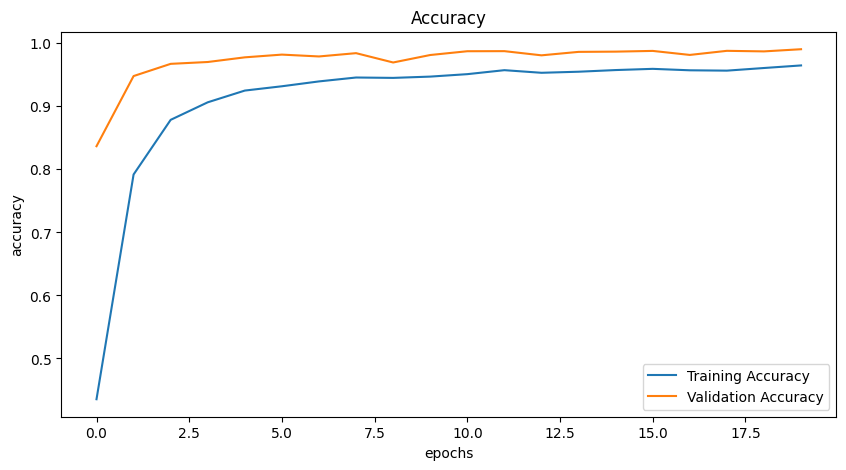

In [29]:
#Plotting Graphs for Accuracy
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

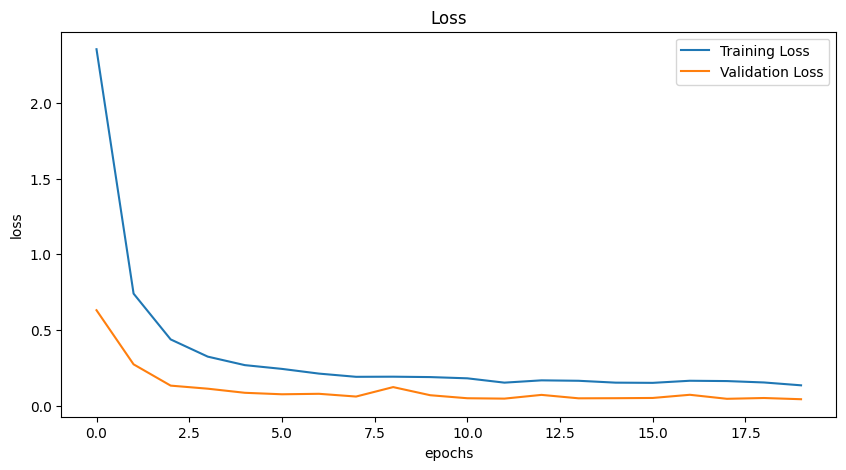

In [30]:
#Plotting Graphs for loss
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evaluation

In [31]:

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.04209526628255844
Test accuracy 0.9906911253929138


In [32]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       1.00      0.96      0.98       404
           2       0.99      0.99      0.99       469
           3       1.00      0.99      0.99       295
           4       0.99      1.00      0.99       403
           5       0.98      0.98      0.98       343
           6       1.00      1.00      1.00        92
           7       0.98      0.99      0.98       298
           8       0.99      0.99      0.99       267
           9       1.00      0.99      0.99       294
          10       1.00      1.00      1.00       398
          11       0.98      1.00      0.99       283
          12       0.99      1.00      1.00       455
          13       1.00      1.00      1.00       435
          14       1.00      1.00      1.00       155
          15       0.99      1.00      1.00       124
          16       1.00      1.00      1.00        85
          17       1.00    

In [34]:
print(confusion_matrix(y_test_class,y_pred_class))

[[ 31   0   0 ...   0   0   0]
 [  1 389   7 ...   0   0   0]
 [  0   0 463 ...   1   0   0]
 ...
 [  0   0   0 ...  71   0   0]
 [  0   0   0 ...   0  53   0]
 [  0   0   0 ...   0   0  54]]


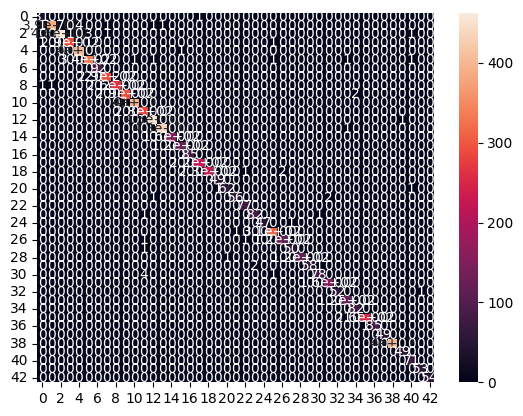

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')


In [36]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9906911502167814

In [38]:
model.save('traffic_classifier.keras')


# Build the simple app using Tkinter

In [39]:
!pip install pyvirtualdisplay


In [40]:
!apt-get update
!apt-get install -y xvfb


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [59.5 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,107 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.

In [41]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(800, 600))
display.start()

In [42]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [43]:
# Install necessary packages for headless environments
!pip install pyvirtualdisplay
!apt-get update
!apt-get install -y xvfb

# Start a virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(800, 600))  # Size can be adjusted
display.start()

# Install Tkinter (in case it's not already installed)
!apt-get install python3-tk

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:

# Now you can import and use Tkinter
import numpy as np
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import os
from keras.models import load_model

# Load the trained model
model = load_model('traffic_classifier.keras')

# Class labels for traffic signs
classes = {
    1: 'Speed limit (20km/h)', 2: 'Speed limit (30km/h)', 3: 'Speed limit (50km/h)', 4: 'Speed limit (60km/h)',
    5: 'Speed limit (70km/h)', 6: 'Speed limit (80km/h)', 7: 'End of speed limit (80km/h)', 8: 'Speed limit (100km/h)',
    9: 'Speed limit (120km/h)', 10: 'No passing', 11: 'No passing veh over 3.5 tons', 12: 'Right-of-way at intersection',
    13: 'Priority road', 14: 'Yield', 15: 'Stop', 16: 'No vehicles', 17: 'Veh > 3.5 tons prohibited', 18: 'No entry',
    19: 'General caution', 20: 'Dangerous curve left', 21: 'Dangerous curve right', 22: 'Double curve',
    23: 'Bumpy road', 24: 'Slippery road', 25: 'Road narrows on the right', 26: 'Road work', 27: 'Traffic signals',
    28: 'Pedestrians', 29: 'Children crossing', 30: 'Bicycles crossing', 31: 'Beware of ice/snow',
    32: 'Wild animals crossing', 33: 'End speed + passing limits', 34: 'Turn right ahead', 35: 'Turn left ahead',
    36: 'Ahead only', 37: 'Go straight or right', 38: 'Go straight or left', 39: 'Keep right', 40: 'Keep left',
    41: 'Roundabout mandatory', 42: 'End of no passing', 43: 'End no passing veh > 3.5 tons'
}

# Tkinter GUI for image classification
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label = tk.Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = tk.Label(top)

def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = np.argmax(model.predict(image), axis=1)
    sign = classes[pred[0] + 1]
    label.configure(foreground='#011638', text=sign)

def show_classify_button(file_path):
    classify_b = tk.Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 4.25), (top.winfo_height() / 4.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload = tk.Button(top, text="Upload an image", command=upload_image, padx=30, pady=10)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=tk.BOTTOM, pady=50)

sign_image.pack(side=tk.BOTTOM, expand=True)
label.pack(side=tk.BOTTOM, expand=True)

heading = tk.Label(top, text="Know Your Traffic Sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()